# Quick data analysis using Pandas

In [1]:
import pandas as pd

In [2]:
FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0102890318_20070206T133547_20070402T070302.csv'

We confirm that we are only working with DATABARRT and WHITEFLUXSYS columns

In [3]:
df = pd.read_csv(FILE_PATH)
df.head()

,DATEBARTT,WHITEFLUXSYS
0,54138.073885,219929.30
1,54138.079811,220816.39
2,54138.085737,220129.64
3,54138.091662,219876.34
4,54138.097588,219744.33


In this case, there are 9229 rows and 2 columns

In [4]:
(row, columns) = df.shape
print(row, columns)

9228 2


Both columns do not have NaN values and they have *float64* Dtype

In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9228 entries, 0 to 9227
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATEBARTT     9228 non-null   float64
 1   WHITEFLUXSYS  9228 non-null   float64
dtypes: float64(2)
memory usage: 144.3 KB


Statistical summary of data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DATEBARTT,9228.0,54165.432390,15.799036,54138.073885,54151.752043,54165.435551,54179.114102,54192.791466
WHITEFLUXSYS,9228.0,221509.549025,1222.856566,214899.080000,221382.510000,221585.635000,221933.035000,224749.330000


### Before results

In [8]:
import plotly.express as px

fig = px.line(df, x='DATEBARTT', y='WHITEFLUXSYS', title='Light Curve')
fig.show()

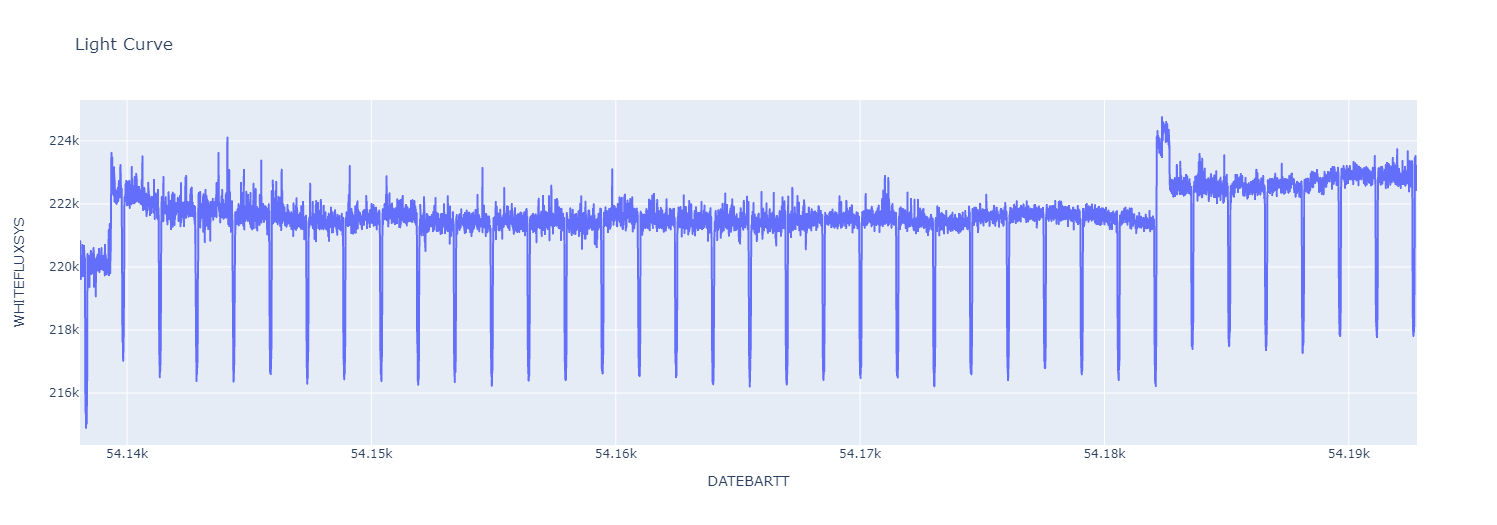

# Transforming into an array

In [11]:
df.head()

,DATEBARTT,WHITEFLUXSYS
0,54138.073885,219929.30
1,54138.079811,220816.39
2,54138.085737,220129.64
3,54138.091662,219876.34
4,54138.097588,219744.33


In [12]:
import numpy as np

In [13]:
y = df.WHITEFLUXSYS.to_numpy()

In [14]:
date = df.DATEBARTT.to_numpy()

In [15]:
# df.drop('DATEBARTT', axis=1)

In [16]:
import pprint as pp

pp.pprint(y)
print('')
pp.pprint(date)

array([219929.3 , 220816.39, 220129.64, ..., 222813.8 , 223179.67,
       222808.1 ])

array([54138.07388529, 54138.07981095, 54138.08573661, ...,
       54192.77961555, 54192.78554097, 54192.79146639])


In [17]:
fig = px.line(x=date, y=y, title='Light Curve with Artificial Borders')
fig.show()

# Artificial borders*

In [18]:
def artificial_borders(array, num):
  aux_pre = np.zeros(num)
  aux_pos = np.zeros(num)
  i = 0
  for i in range(num):
    aux_pre[i] = array[0]
    aux_pos[i] = array[-1]
  
  return np.concatenate((aux_pre, array, aux_pos)).ravel()

In [19]:
whiteflux_artificial_borders = artificial_borders(y, 15)
pp.pprint(whiteflux_artificial_borders)

array([219929.3, 219929.3, 219929.3, ..., 222808.1, 222808.1, 222808.1])


In [20]:
datebartt_artificial_borders = artificial_borders(date, 15)
pp.pprint(datebartt_artificial_borders)

array([54138.07388529, 54138.07388529, 54138.07388529, ...,
       54192.79146639, 54192.79146639, 54192.79146639])


In [21]:
fig = px.line(x=datebartt_artificial_borders, y=whiteflux_artificial_borders, title='Light Curve with Artificial Borders')
fig.show()

# Multiplicar a curva de luz por -1^(i)

In [25]:
def multiplying_by_minus_one_to_index(array):
  i = 0
  new_array = np.ones(len(array))

  for i in range(len(array)):
    new_array[i] = array[i] * ( (-1)**(i) )
  
  return new_array

In [26]:
whiteflux_multiplied = multiplying_by_minus_one_to_index(whiteflux_artificial_borders)
pp.pprint(whiteflux_multiplied)

array([ 219929.3, -219929.3,  219929.3, ..., -222808.1,  222808.1,
       -222808.1])


In [27]:
datebartt_multiplied = datebartt_artificial_borders

In [52]:
fig = px.scatter(x=datebartt_multiplied, y=whiteflux_multiplied, title='Light Curve Multiplied')
fig.show()

# Padding

In [29]:
def padding(array):
  return np.append(array, np.zeros(len(array)))

In [30]:
whiteflux_padding = padding(whiteflux_multiplied)
print(len(whiteflux_padding))

18516


In [31]:
datebartt_padding = padding(datebartt_multiplied)
print(len(datebartt_padding))

18516


In [33]:
fig = px.line(x=datebartt_padding, y=whiteflux_padding, title='Light Curve Padded')
fig.show()

# Transformada de Fourier

In [34]:
# whiteflux_fft = np.real(np.fft.fft(whiteflux_padding))

whiteflux_fft = np.fft.fft(whiteflux_padding)

pp.pprint(whiteflux_fft)

array([-1.92555400e+04-3.59432306e-09j,  2.16276389e+05+1.20816656e+04j,
       -1.93407988e+02+4.74992761e+03j, ...,
        2.30470088e+05-4.05994950e+03j, -1.93407988e+02-4.74992761e+03j,
        2.16276389e+05-1.20816656e+04j])


### Removendo o valor maximo



In [42]:
np.max(whiteflux_fft)

(2050731179.3999996-4.432240530150011e-08j)

In [45]:
i = np.where(whiteflux_fft == np.max(whiteflux_fft))

whiteflux_fft_new = np.delete(whiteflux_fft, i)

In [46]:
np.max(whiteflux_fft_new)

(2151401.5991494386+977891.9707136351j)

### Plotando apenas a parte real

In [48]:
t = np.arange(len(whiteflux_fft_new))
pp.pprint(t)

array([    0,     1,     2, ..., 18512, 18513, 18514])


In [49]:
len(np.real(whiteflux_fft))

18516

In [51]:
fig = px.line(x=t, y=np.real(whiteflux_fft_new), title='FFT')
fig.show()

# Testes


## Discrete Fourier Transform (FFT)

In [ ]:
fig = px.line(df, x='DATEBARTT', y='WHITEFLUXSYS', title='Light Curve')
fig.show()

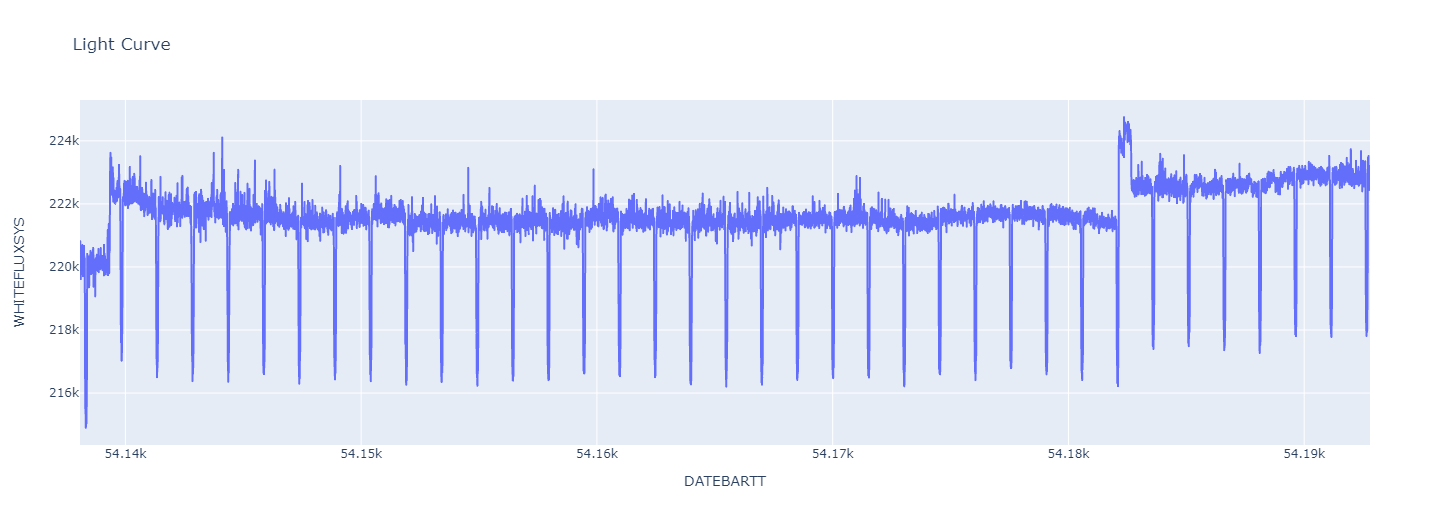

In [144]:
n = row  # number of points in the chart - number of .csv lines
tx = 30000 # x-axis size, from 0 to 30000
w = 2.0 * np.pi / tx # angular frequency

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in true_divide



In [145]:
# creating the time base
t = np.linspace(0, tx, n)

s = np.array(df.WHITEFLUXSYS)

In [148]:
freq = np.fft.fftfreq(n)

mascara = freq > 0 # only positive values

In [149]:
fft_calculo = np.fft.fft(s)

# to be all positive, you have to calculate the absolute value of the transform
fft_abs = 2.0*np.abs(fft_calculo/n)

In [ ]:
x_fft = freq[mascara]*n
y_fft = fft_abs[mascara]

In [ ]:
df_fft = pd.DataFrame()
df_fft.insert(0, "x_fft", x_fft)
df_fft.insert(1, "y_fft", y_fft)

In [ ]:
fig = px.line(df_fft, x='x_fft', y='y_fft', title='FFT Light Curve', width=1400, height=600)

fig.show()

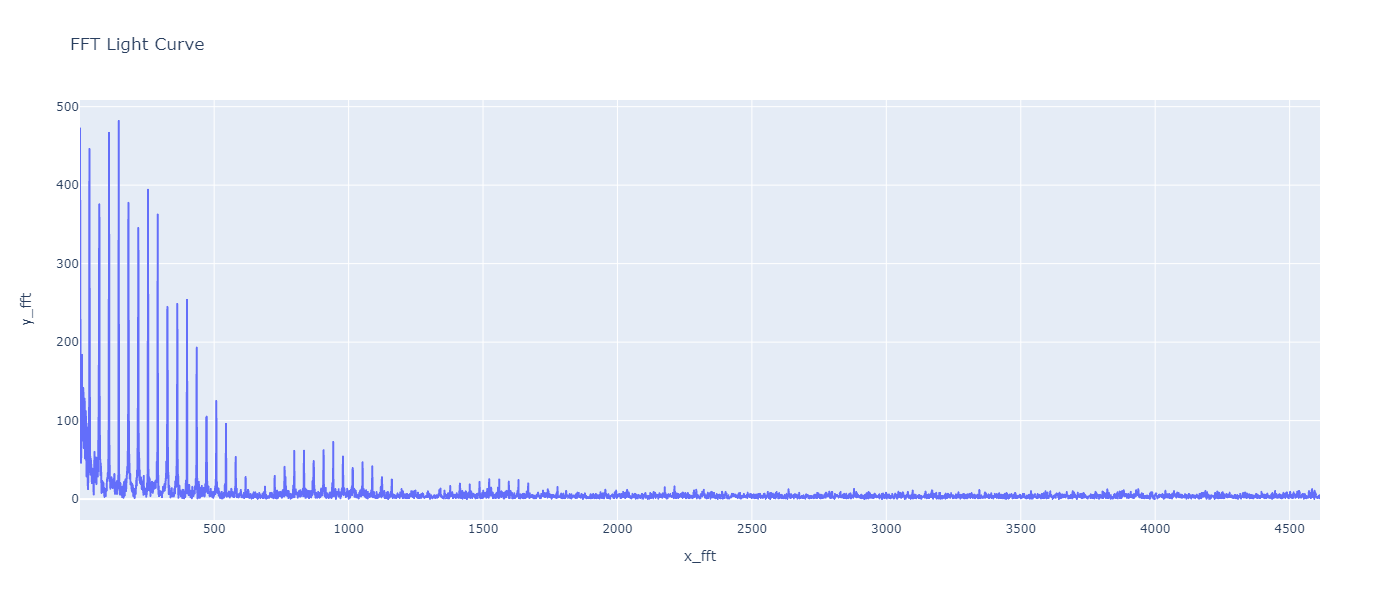

In [ ]:
df_fft.head()

,x_fft,y_fft
0,1.0,472.352980
1,2.0,273.880366
2,3.0,159.937251
3,4.0,124.259622
4,5.0,46.426902


## Butterworth filter


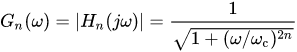

where:

- G is the gain of an n-order Butterworth low-pass filter
- H is transfer funcion
- j is imaginary number
- n is the number of poles in the filter—equal to the number of reactive elements in a passive filter
- ω  is the angular frequency in radians per second,
- ${\displaystyle \omega _{\mathrm {c} }}{\displaystyle \omega _{\mathrm {c} }}$ is the cutoff frequency.